# BEM 111 HW 2
## Iris Xiang 


### Problem 2 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
# import data 

df = pd.read_excel("https://raw.githubusercontent.com/xxiang27/bem111data-/main/ratio_data.xlsx")

In [3]:
df.head()

,Date,AAPL,AMZN,ED,F,JNJ,JPM,ORCL,TSLA,V,WMT,XOM
0,2021-12-31,1.074229,0.950748,1.098918,1.082335,1.097095,0.996978,0.961098,0.923145,1.118388,1.033013,1.022560
1,2021-11-30,1.105082,1.039924,1.039940,1.129194,0.963601,0.934899,0.945799,1.027612,0.916613,0.941173,0.940658
2,2021-10-29,1.058657,1.026602,1.038711,1.206215,1.008545,1.044131,1.104944,1.436530,0.950707,1.072033,1.096056
3,2021-09-30,0.931963,0.946482,0.962094,1.086723,0.932825,1.023382,0.977561,1.054042,0.972283,0.941121,1.078870
4,2021-08-31,1.042489,1.043034,1.033005,0.934050,1.011375,1.053828,1.022837,1.070605,0.931094,1.042757,0.961355


In [4]:
# We now compute the Pukthuanthong-Roll SDF Volatility for each of the 10 month periods in the dataframe. 
# We know that we have 120 months worth of data
import copy 

def compute_sdfs(df):
  df_nodate = df.drop('Date',axis=1)
  sdf_lst = []
  # We stop i at 110 because we use i+10 to index our dataframe 
  for i in range(0,111,10):
    # split dataframe into nonoverlapping 10 month periods
    period = np.array(df_nodate.iloc[i:i+10])
    # specify n unit vector 
    u = np.array([1]*11)
    # calculate sdf 
    phi = 10*np.linalg.inv((period.dot(period.T))).dot(period).dot(u)
    # calculate sdf using phi 
    sdf = np.sqrt((1/10)*phi.T.dot(phi) - np.average(phi)**2) * np.sqrt(12)
    sdf_lst.append(sdf)
  return sdf_lst

# We also write a function to calculate sharpe ratios and take the largest one 

def compute_sharpe_ratios(df):
  df_nodate = df.drop('Date',axis=1)
  # We minus everything by 1 to get rate of return values
  df_nodate = df_nodate - 1
  sharpe_ratios = []
  for i in range(0,111,10):
    # split dataframe into nonoverlapping 10 month periods
    period = df_nodate.iloc[i:i+10]
    # calculate sharpe ratios 
    averages = period.mean(axis=0)
    stdevs = period.std(axis=0)
    ratios = averages.div(stdevs)
    # take the maximum over the period and annualize 
    sharpe_ratio = max(ratios)*np.sqrt(12)
    sharpe_ratios.append(sharpe_ratio)
  return sharpe_ratios


In [5]:
sharpe_ratios = compute_sharpe_ratios(df)
sdfs = compute_sdfs(df)


In [6]:
# We can look at our values for the calculated Pukthuanthong-Roll SDF Volatilities
sdfs

[4.260988394553534,
 15.134061458572592,
 7.904105806294716,
 5.675626820526004,
 10.13812700887985,
 8.213182279313298,
 29.704419277477452,
 9.062077276436357,
 28.325684699334758,
 5.241462302445044,
 10.973848573329816,
 17.24151575011007]

In [7]:
# We also look at our calculated maximum sharpe ratios 
sharpe_ratios

[2.3753046713047015,
 3.8922804963717277,
 2.2181814732263136,
 1.3176484861109352,
 2.912301426779576,
 4.783570174472008,
 2.992230671278949,
 1.205750147292142,
 1.908825864206034,
 2.3012546255548254,
 2.984798927526658,
 2.016862949675419]

In [8]:
# By the Hansen-Jagannathan bound, every sharpe ratio should be less than or equal to its corresponding SDF volatility
def compare(sdfs, sharpe_ratios):
  for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i] <= sdfs[i]:
      print("Yes")
    else:
      print("No")
    
compare(sdfs, sharpe_ratios)

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


Therefore, we see that it seems from this small sample that the Hansen-Jagannathan bound usually holds. 

### Problem 3

In [9]:
# We select the 60 first months of the given 120 months. 
df_recent60 = df.tail(60)

# We average the relative returns for each row  
df_recent60_mean = df_recent60.mean(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """


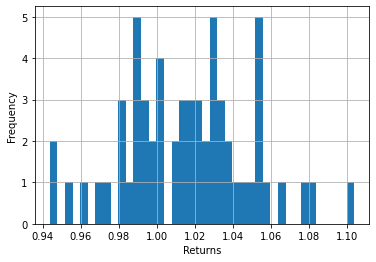

In [10]:
# We can visualize our averaged relative returns 
import matplotlib.pyplot as plt
plt.hist(df_recent60_mean, bins = 40)
plt.xlabel('Returns')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [11]:
# We then sort the returns 
sorted_returns = df_recent60_mean.sort_values()
sorted_returns.head()

115    0.943637
76     0.943777
71     0.955391
87     0.962464
95     0.970247
dtype: float64

In [12]:
# We get our 95% VaR
xth = int(np.floor(0.05 * 60))-1
VaR = sorted_returns.iloc[xth]
VaR

0.9553913547556053

In [13]:
# We now take the most recent 60 months and see how well our VaR holds up. 
df_holdout = df.head(60)
df_holdout_mean = df_holdout.mean(axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


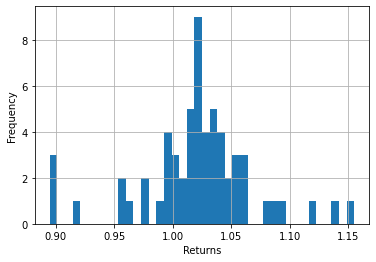

In [14]:
# We visualize our returns again just to see the differences between the previous and the holdout sample 
plt.hist(df_holdout_mean, bins = 40)
plt.xlabel('Returns')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [15]:
# We can calculate our exceedance count 
exceedances = df_holdout_mean[df_holdout_mean < VaR]
exceedances

21    0.895028
22    0.900816
31    0.920264
36    0.901489
dtype: float64

In [16]:
exceedance_count = len(exceedances)
exceedance_count

4

In [17]:
exceedance_percentage = exceedance_count/60*100
exceedance_percentage

6.666666666666667

We see that 4 out of our 60 observations were losses that exceeded our 95% VaR, which equates to about 6.67%. Therefore, a loss greater than our 95% VaR happened 6.67% of the time on our test set, as opposed to less than 5% of the time. So our 95% VaR did not hold. However, it still did well considering our small sample size and since 6.67% is decently close to 5%. 